In [27]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import keras
from PIL import Image
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2
from keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.applications import VGG16, InceptionResNetV2 , VGG19
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [28]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [29]:
train_dir = 'DATASET/TRAIN' #directory with training images
test_dir = 'DATASET/TEST' #directory with testing images

In [30]:
train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  shear_range = 0.2,
                                  zoom_range = 0.2, 
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

In [31]:
'''
folder_path = 'DATASET/TRAIN'
extension=[]
index=0

for fldr in os.listdir(folder_path):
    sub_folder_path = os.path.join(folder_path, fldr)
    for files in os.listdir(sub_folder_path):
        file_path=os.path.join(sub_folder_path,files)
        print('** Path:{} **'.format(file_path),end="\r",flush=True)
        print(file_path)
        im=Image.open(file_path)
        rgb_im=im.convert('RGBA')
'''

'\nfolder_path = \'DATASET/TRAIN\'\nextension=[]\nindex=0\n\nfor fldr in os.listdir(folder_path):\n    sub_folder_path = os.path.join(folder_path, fldr)\n    for files in os.listdir(sub_folder_path):\n        file_path=os.path.join(sub_folder_path,files)\n        print(\'** Path:{} **\'.format(file_path),end="\r",flush=True)\n        print(file_path)\n        im=Image.open(file_path)\n        rgb_im=im.convert(\'RGBA\')\n'

In [32]:
train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (224,224),
                                                    color_mode = 'rgb',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (224,224),
                                                  color_mode = 'rgb',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 861 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu',padding = 'Same', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Dropout(0.25),   
    tf.keras.layers.Conv2D(128, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu',padding = 'Same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1024, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [34]:
optimizer = Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer = optimizer,
              metrics=['accuracy'])
epochs = 50  
batch_size = 16

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 224, 224, 64)      1792      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 112, 112, 64)     0         
 2D)                                                             
                                                                 
 dropout_8 (Dropout)         (None, 112, 112, 64)      0         
                                                                 
 conv2d_7 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                             
                                                                 
 dropout_9 (Dropout)         (None, 56, 56, 128)      

In [36]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [37]:


early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

history = model.fit(train_generator, epochs = epochs,validation_data = validation_generator,callbacks = [early_stopping])



Epoch 1/50
54/54 [==============================] - 195s 4s/step - loss: 3.9432 - accuracy: 0.2416 - val_loss: 1.6022 - val_accuracy: 0.2500
Epoch 2/50
54/54 [==============================] - 194s 4s/step - loss: 1.5986 - accuracy: 0.2416 - val_loss: 1.5626 - val_accuracy: 0.4239
Epoch 3/50
54/54 [==============================] - 200s 4s/step - loss: 1.5545 - accuracy: 0.3020 - val_loss: 1.3502 - val_accuracy: 0.4565
Epoch 4/50
54/54 [==============================] - 196s 4s/step - loss: 1.4395 - accuracy: 0.4030 - val_loss: 1.1049 - val_accuracy: 0.6522
Epoch 5/50
54/54 [==============================] - 198s 4s/step - loss: 1.3814 - accuracy: 0.4518 - val_loss: 1.0112 - val_accuracy: 0.6522
Epoch 6/50
54/54 [==============================] - 192s 4s/step - loss: 1.3148 - accuracy: 0.4623 - val_loss: 0.8924 - val_accuracy: 0.7065
Epoch 7/50
54/54 [==============================] - 190s 4s/step - loss: 1.2882 - accuracy: 0.4983 - val_loss: 0.8635 - val_accuracy: 0.7391
Epoch 8/50
54

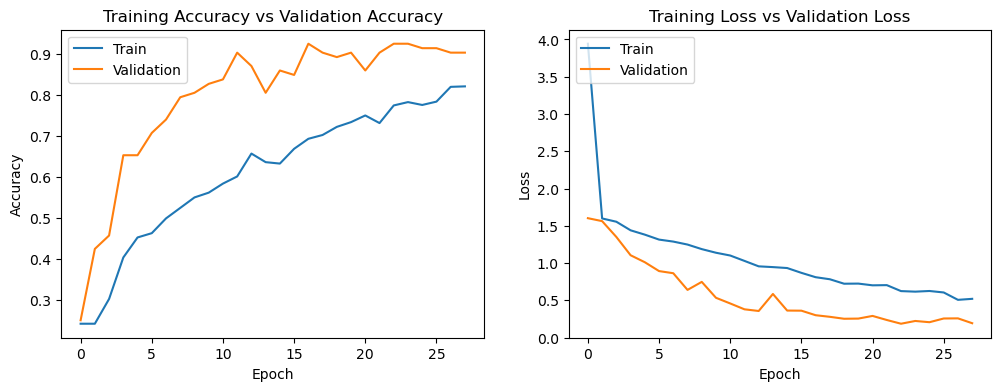

In [38]:
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
fig.set_size_inches(12,4)

ax[0].plot(history.history['accuracy'])
ax[0].plot(history.history['val_accuracy'])
ax[0].set_title('Training Accuracy vs Validation Accuracy')
ax[0].set_ylabel('Accuracy')
ax[0].set_xlabel('Epoch')
ax[0].legend(['Train', 'Validation'], loc='upper left')

ax[1].plot(history.history['loss'])
ax[1].plot(history.history['val_loss'])
ax[1].set_title('Training Loss vs Validation Loss')
ax[1].set_ylabel('Loss')
ax[1].set_xlabel('Epoch')
ax[1].legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [39]:
train_loss, train_acc = model.evaluate(train_generator)
test_loss, test_acc   = model.evaluate(validation_generator)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_acc*100, test_acc*100))

3/3 [==============================] - 4s 996ms/step - loss: 0.1860 - accuracy: 0.9239
final train accuracy = 82.93 , validation accuracy = 92.39


In [40]:
model.save('YogaNet_model_2_1.h5')

1/1 [==============================] - 0s 325ms/step


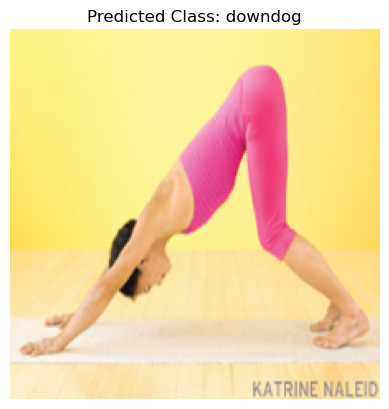

In [45]:
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import img_to_array
import tensorflow as tf


import numpy as np
import cv2




from matplotlib.collections import LineCollection
import matplotlib.patches as patches

# Some modules to display an animation using imageio.
import imageio
from IPython.display import HTML, display


model = load_model('YogaNet_model_2_1.h5')



img = load_img('target.jpg', target_size=(224, 224))
x = img_to_array(img)
x = np.expand_dims(x, axis=0)
img_data = preprocess_input(x)
classes = model.predict(img_data)

array = classes.flatten()


indices = np.where(array == 1)[0]



if len(indices) > 0:
    index = indices[0]
    if index == 0:
        pose_name ='downdog'
    elif index == 1:
        pose_name ='goddess'
    elif index == 2:
        pose_name ='plank'
    elif index == 3:
        pose_name ='tree'
    else:
        pose_name ='warrior2'



plt.imshow(img)
plt.axis('off')
plt.title('Predicted Class: {}'.format(pose_name))
plt.show()

